In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import post_patch as pp #post patch script

sns.set(context = "notebook", style = "darkgrid")

In [2]:
def get_shiny_df():
    """Gathers shiny csv into a pandas dataframe.
    
    Args:
        None
    Returns:
        shiny_df: a pandas dataframe with mouse and human shiny data
    
    """
    shiny_human_df = pd.read_csv('C:/users/kumar/documents/github/personal-projects/csv/shiny_human.csv')
    shiny_mouse_df = pd.read_csv('C:/users/kumar/documents/github/personal-projects/csv/shiny_mouse.csv')
    frames = (shiny_human_df, shiny_mouse_df)
    shiny_df = pd.concat(frames)
    shiny_df = shiny_df.loc[:,['sample_id', 'res_index_label', 'cluster_label']]
    return shiny_df

In [3]:
def get_json_df():
    """To create json_df(dates:2017-10-02 to 2019-01-15).
    
    Args: 
        None
    Returns: 
        json_df:
    
    """
        
    json_df = pd.read_csv("C:/users/kumar/documents/github/personal-projects/csv/jem_metadata.csv")
    json_df = json_df[json_df['status'] == 'SUCCESS']
    
    json_df.dropna(subset = ['container', 'cell_depth', 'recording.pipetteR'], inplace = True)
    #json_df = json_df[json_df['container'].str.match('PA')]

    #Creates patch_duration column and outputs in minutes
    json_df['patch_duration'] = pd.to_datetime(json_df['extraction.timeRetractionEnd']) - pd.to_datetime(json_df['recording.timeWholeCellStart'])
    json_df['patch_duration'] = (json_df['patch_duration'].astype('timedelta64[s]'))/60

    json_df = pp.postpatch_reclass(json_df) #Makes post patch column with the script

    json_df = json_df[['date', 'container', 'patch_duration', 'cell_depth', 'post_patch', 'recording.pipetteR']]
                        #'extraction.endPipetteR', 'extraction.extractionNotes'
    
    json_df['date'] = json_df['date'].str[:10] #Strip away the time
    json_df['date'] = pd.to_datetime(json_df['date']) #Converting to YYYY-MM-DD
    json_df.sort_values(by = ['date'], inplace = True) #Sorts date column
    return json_df

In [4]:
def merge_dfs(df1, df2):
    """Merge two dataframes.
    
    Args:
        df1:
        df2:
    Returns:
        merged_df:
    
    """
    
    merged_df = pd.merge(left = df1, right = df2, left_on = 'container', right_on = 'sample_id', how = 'inner')
    merged_df.drop(columns = ['sample_id'], inplace = True)
    merged_df.sort_values(by = ['date'], inplace = True) #Sorts by date column ascending
    return merged_df

In [5]:
def sort_df(df):
    """To sort dataframe to only show 2018 data.
    
    Args: 
        df: pandas dataframe
    Returns: 
        df:
    
    """
    
    df = df.set_index('date') #Set date column as index column 
    start_date = '2018-01-01'
    end_date = '2018-12-31'
    df = df[start_date:end_date] #Choosing start & end date
    df.sort_index(inplace=True)
    df.reset_index(inplace=True)
    return df

In [6]:
#Making global variables
json_df = get_json_df()
shiny_df = get_shiny_df()
merged_df = merge_dfs(json_df, shiny_df)
final_all_df = sort_df(merged_df) #final_all_df Dates: 2018-01-03 to 2018-11-20

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (5,6,7,9,11,12,13,16,17,18,19,20,22,23,24,25,28,29,30,31,32,33,37,38,40,43,45,46,47,48,50,54,55,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [7]:
json_df.tail()

date            container  patch_duration  cell_depth  \
7953 2019-04-09  PXS4_190409_654_A01       10.683333         0.0   
7955 2019-04-09  PXS4_190409_352_A01       15.483333        45.2   
7959 2019-04-09  PXS4_190409_356_A01       10.833333        63.3   
7946 2019-04-09  P1S4_190409_001_A01       15.283333        38.5   
7969 2019-04-09  PFS4_190409_704_A01       11.033333        48.9   

         post_patch  recording.pipetteR  
7953   Nuc-low seal                 3.7  
7955   Nuc-low seal                 5.1  
7959   Nuc-low seal                 3.8  
7946  Nuc-high seal                 4.7  
7969  Nuc-high seal                 5.2

In [8]:
merged_df.tail()

date            container  patch_duration  cell_depth  \
6109 2019-01-10  PES4_190110_651_A01       10.866667        84.7   
6115 2019-01-10  PFS4_190110_703_A01       12.616667        21.0   
6123 2019-01-11  P1S4_190111_002_A01        9.166667        52.9   
6122 2019-01-11  P1S4_190111_003_A01       10.133333        61.3   
6124 2019-01-11  P1S4_190111_001_A01        9.283333        48.3   

         post_patch  recording.pipetteR  res_index_label     cluster_label  
6109  Nuc-high seal                 4.1         1.000000  Sst Calb2 Pdlim5  
6115  Nuc-high seal                 4.2         1.000000  Pvalb Reln Itm2a  
6123  Nuc-high seal                 5.6         0.714428               n91  
6122  Nuc-high seal                 3.4         1.000000  Sst Calb2 Pdlim5  
6124  Nuc-high seal                 5.0         1.000000    Sst Hpse Cbln4

In [9]:
final_all_df.head()

date            container  patch_duration  cell_depth     post_patch  \
0 2018-01-02  P8S4_180102_352_A01        7.916667        40.1  Nuc-high seal   
1 2018-01-02  P9S4_180102_402_A01        8.566667        37.7  Nuc-high seal   
2 2018-01-02  P8S4_180102_353_A01        7.900000        57.3  Nuc-high seal   
3 2018-01-02  P9S4_180102_403_A01        8.250000        45.7  Nuc-high seal   
4 2018-01-02  P8S4_180102_351_A01        7.950000        62.7   Nuc-low seal   

   recording.pipetteR  res_index_label         cluster_label  
0                 3.9         0.000000                    n3  
1                 4.1         1.000000  Vip Rspo4 Rxfp1 Chat  
2                 3.7         0.650698                   n61  
3                 3.4         1.000000        Sst Hpse Cbln4  
4                 4.6         0.898197                   n74

In [10]:
final_all_df.tail()

date            container  patch_duration  cell_depth  \
4942 2018-12-21  PBS4_181221_501_A01        8.050000        62.4   
4943 2018-12-21  PBS4_181221_506_A01       10.166667        63.3   
4944 2018-12-21  PBS4_181221_502_A01        8.483333        57.6   
4945 2018-12-21  PBS4_181221_504_A01       14.466667        72.2   
4946 2018-12-21  P8S4_181221_354_A01       14.966667        40.4   

         post_patch  recording.pipetteR  res_index_label      cluster_label  
4942  Nuc-high seal                 3.3         0.732810                n66  
4943  Nuc-high seal                 3.7         1.000000  Vip Col15a1 Pde1a  
4944   Nuc-low seal                 3.0         0.700977                n63  
4945  Nuc-high seal                 3.7         1.000000   L4 IT VISp Rspo1  
4946  Nuc-high seal                 4.8         0.891010                n65

In [20]:
#Histogram plot dfs
nuh_df = final_all_df[final_all_df['post_patch'] == 'Nuc-high seal']
nol_df = final_all_df[final_all_df['post_patch'] == 'No-low seal']

def hist(df, colors):
    """To create a histogram plot using df.
    
    Arguements:
        df: pandas dataframe
        colors: color
    
    Returns: None
    """
    plt.figure(figsize=(15,8))
    
    bins = np.arange(2, 8, 0.1) #Displays cell depth 0 to 100 um, split by 5 
    ax = sns.distplot(df["recording.pipetteR"], bins=bins, kde=False, color=colors)
    #kde = kernal density estimate line
    ax.set(xlabel = 'Pipette Size (MOhms)', ylabel = 'Count of nucleated patch')
    ax.set_title("Counts of nucleated patches at cell depth")

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


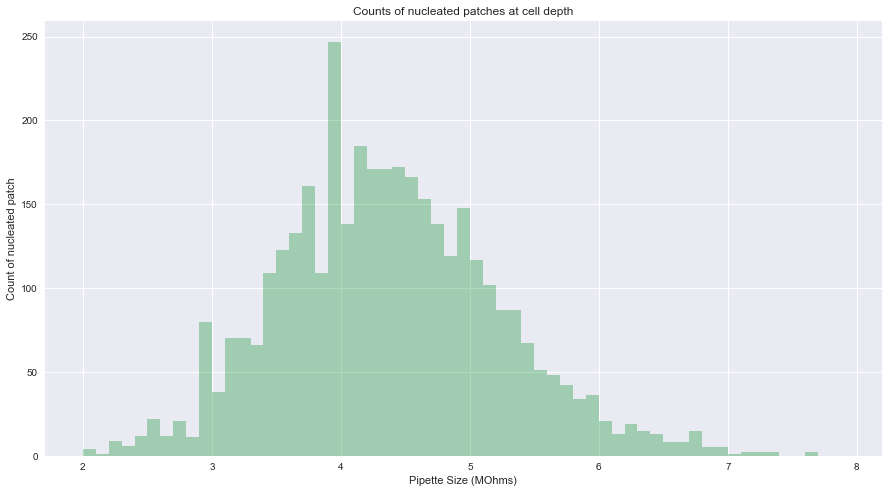

In [21]:
hist(nuh_df, '#31a354')

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


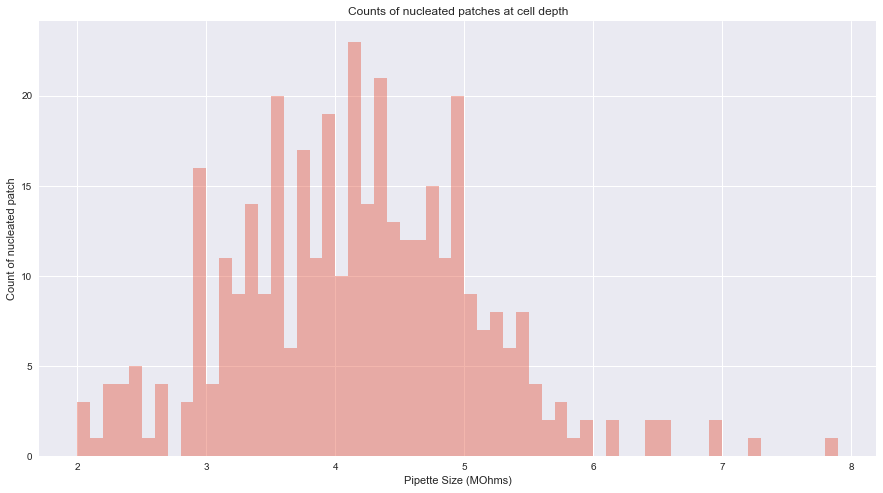

In [22]:
hist(nol_df, '#e34a33')